In [4]:
# import dependensi
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from sklearn.model_selection import train_test_split

# load data house-prices.csv dan drop kolom House
df = pd.read_csv('house-prices.csv')
df = df.drop(['Home'], axis=1)

# pisah data menjadi fitur dan target
X = df.drop(['Price'], axis=1).copy()
y = df['Price'].copy()

"""One Hot Encoding START"""
# buat nilai dummies dari Neighborhood
X = pd.get_dummies(X, columns=['Neighborhood'])

# gantikan True menjadi 1 dan False menjadi 0
X = X.replace({True: 1, False: 0})

# gantikan Yes menjadi 1 dan No menjadi 0
X = X.replace({'Yes': 1, 'No': 0})
"""One Hot Encoding END"""

# split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalisasikan fitur dengan z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-4-2a59e194c5e3>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({True: 1, False: 0})
<ipython-input-4-2a59e194c5e3>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({'Yes': 1, 'No': 0})


In [5]:
# set random seed untuk tensorflow
tf.random.set_seed(42)

# defenisikan fungsi MAPE
def mape(y_true, y_pred):
    # buat nilai y_true dan y_pred menjadi float32 dengan tf.cast
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.keras.backend.mean(tf.keras.backend.abs((y_true - y_pred) / y_true)) * 100

# buat model dengan input X_train, 2 hidden layer yang masing masing mempunyai 32 dan 16 neuron dengan fungsi aktivasi relu, dan 1 output
model = keras.Sequential([
    keras.layers.Dense(48, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01) ),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 17939904512.0000 - mae: 131274.4531 - mape: 99.9992 - val_loss: 21098680320.0000 - val_mae: 141298.2656 - val_mape: 99.9987
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 17939668992.0000 - mae: 131273.5781 - mape: 99.9986 - val_loss: 21098414080.0000 - val_mae: 141297.3906 - val_mape: 99.9981
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17939423232.0000 - mae: 131272.7031 - mape: 99.9979 - val_loss: 21098131456.0000 - val_mae: 141296.4688 - val_mape: 99.9974
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17939165184.0000 - mae: 131271.7656 - mape: 99.9972 - val_loss: 21097811968.0000 - val_mae: 141295.4062 - val_mape: 99.9967
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17938878464.0000 - mae: 131270.7031 - mape: 99.9963 - val_loss: 21097459712.0000 - val_mae: 141294.2188 - val_mape: 99.9959
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 17938563072.000

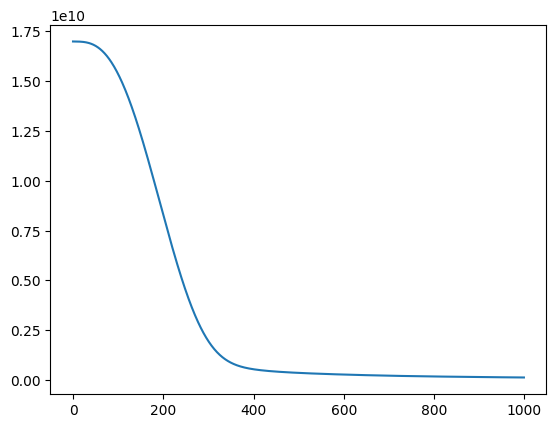

In [6]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae', mape])

# latih model dan tambahkan early stop dengan patience 10, batch size 8
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=1000, batch_size=8, validation_split=0.2, callbacks=[early_stop])

# buat grafik history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [7]:
# evaluasi model dengan data test
loss = model.evaluate(X_test, y_test)
print(f'Akurasi (100 - MAPE)% :{int(100-loss[2])} %', )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 285615744.0000 - mae: 12608.6357 - mape: 9.8258
Akurasi (100 - MAPE)% :90 %


In [8]:
# prediksi data baru dengan X_test
y_pred = model.predict(X_test)

# tampilkan hasil prediksi
print('Hasil Prediksi:')
print(y_pred.reshape(-1))

# tampilkan nilai aktual
print('Nilai Aktual:')
print(y_test.values)

# tampilkan r2_score
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Hasil Prediksi:
[123753.734 124883.85  161111.72  105273.9   142073.69  128040.266
 141400.67   90207.75  186645.94  119215.5   173636.34  105499.89
 117551.23  124599.75  147591.69   93900.734 113331.21  135302.78
 118653.06  101117.234 138275.34  119814.19   92415.625 126823.78
 163134.16   95559.   ]
Nilai Aktual:
[125700 106600 167200 112300 145500 140900 165600  82300 184300 137000
 160600  99300 130300 119800 133300 115700 117500 143400 113500  90500
 111400 132500 150200 123000 146900 103200]
R2 Score: 0.5154121518135071


In [ ]:
# save model.keras
model.save('model_regresi_rumah.keras')